In [3]:

import numpy as np  # NumPy library for linear algebra operations and more
import pandas as pd  # Pandas library for working with tabular data
import matplotlib.pyplot as plt  # Matplotlib library for visualization
from matplotlib.colors import ListedColormap  # Matplotlib function to generate color maps
from sklearn.datasets import make_blobs  # Sklearn function to generate synthetic datasets

In [4]:

plt.style.use('dark_background')

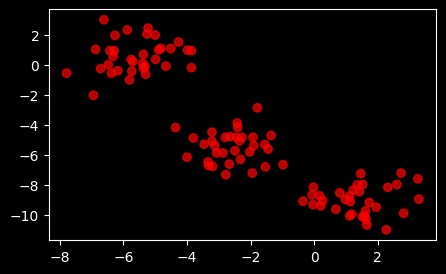

In [8]:
colors =("#FF0000")
cm_bright = ListedColormap(colors)

X, y = make_blobs(n_samples=100, random_state=16)

plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1],c=y,cmap=cm_bright,alpha=0.7);

In [10]:
def kmeanspp(X, k=3, seed=0):
    centroids = []

    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

    return centroids

In [9]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        centroids = kmeanspp(X, k=k, seed=seed)

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

$${Distortion} = \frac{1}{n} \sum_{i=1}^{n} \left( \text{distance}(\text{point}_i, \text{centroid}) \right)^2$$



$$\sum_{k=1}^{K}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k})$$



 $$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k})$$

In [13]:
inertias = []
for i in range(1, 7):
    centroids, clusters = KMeans(X, k=i)
    dists = 0
    for i in clusters:
        for x in clusters[i]:
            dists += np.linalg.norm(x - centroids[i]) ** 2

    inertias.append(dists)

stopping at iter 1
stopping at iter 1
stopping at iter 2
stopping at iter 8
stopping at iter 2
stopping at iter 2


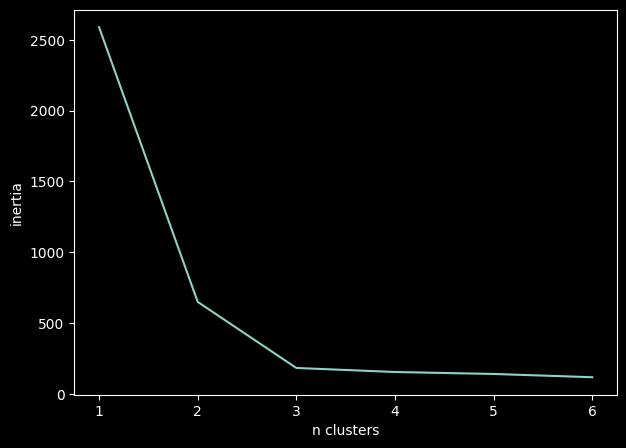

In [14]:
plt.figure(figsize=(7, 5))
plt.plot(inertias)
plt.xticks(np.arange(0, 6), np.arange(1, 7))
plt.xlabel('n clusters')
plt.ylabel('inertia');

We will watch the change of inertia at each step, and at the moment when it sharply slows down (relative to the previous change) we stop

$${inertia_{k+1}-inertia_{k}}$$

In [15]:
diff = np.diff(inertias)

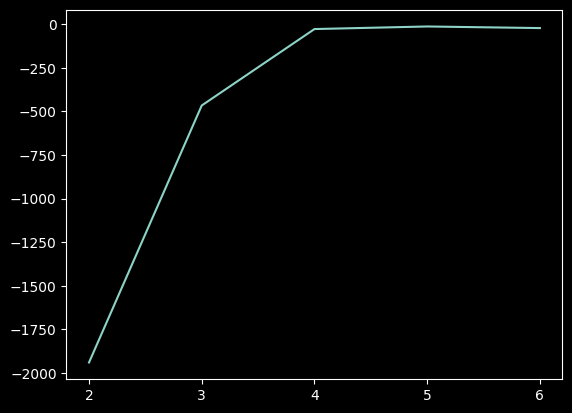

In [16]:
plt.plot(diff)
plt.xticks(np.arange(0, 5), np.arange(2, 7));

Now we can find the optimal number of clusters using this formula

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [17]:
diff_r = diff[1:] / diff[:-1]

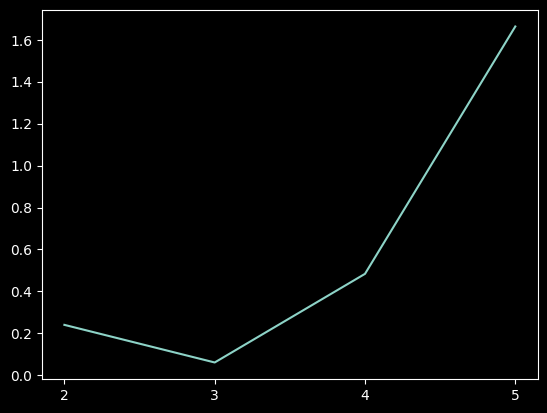

In [18]:
plt.plot(diff_r)
plt.xticks(np.arange(0, 4), np.arange(2, 6));

In [19]:
centroids, clusters = KMeans(X, k=3)

stopping at iter 2


In [21]:
colors = ["#FF0000", "#00FF00", "#0000FF"]

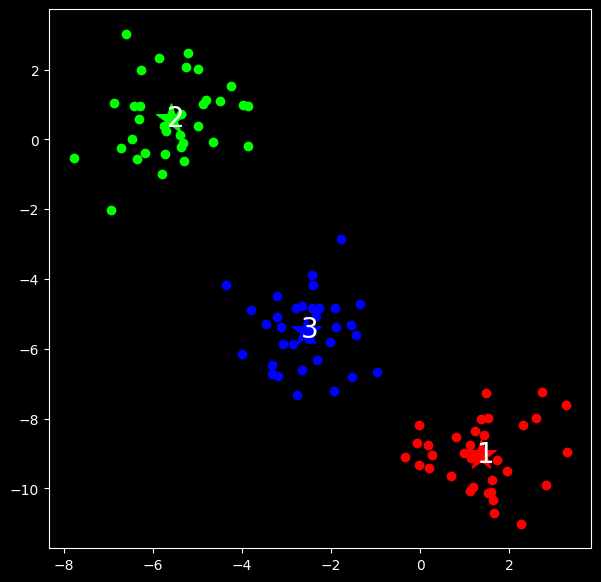

In [22]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);